# Practica 8 KNN



## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Procesamiento de Datos

In [2]:
# Lectura de los datos de países
codigo_paises = pd.read_csv('WDICountry.csv', usecols=['Country Code', 'Short Name', 'Income Group'])

# Lectura del segundo archivo con los indicadores
info_paises = pd.read_csv('WDICSV.csv', usecols=['Country Code', 'Indicator Name', '2020'])

# Lista de indicadores de interés
indicadoresInteres = ['Life expectancy at birth, total (years)', 'CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)']

# Filtrar el DataFrame para incluir solo los indicadores de interés
info_paises_filtrado = info_paises[info_paises['Indicator Name'].isin(indicadoresInteres)]

# Pivotar info_paises_filtrado para tener indicadores como columnas
info_paises_pivot = info_paises_filtrado.pivot(index='Country Code', columns='Indicator Name', values='2020')

# Combinar los DataFrames paisesElegidos e info_paises_pivot
df_combinado = codigo_paises.merge(info_paises_pivot, on='Country Code', how='left')

# Ahora df_combinado debería tener la forma deseada con una fila por país y columnas para cada indicador
df_combinado = df_combinado.set_index('Country Code').dropna()

conjunto_de_pruebas = df_combinado.sample(n=30, random_state=123)
# df_combinado = df_combinado.drop(conjunto_de_pruebas.index)

df_combinado

,Short Name,Income Group,CO2 emissions (metric tons per capita),GDP per capita (current US$),"Life expectancy at birth, total (years)"
Country Code,,,,,
AFG,Afghanistan,Low income,0.223479,516.866797,62.575
AGO,Angola,Lower middle income,0.592743,1502.950754,62.261
ALB,Albania,Upper middle income,1.544550,5343.037704,76.989
ARE,United Arab Emirates,High income,20.252272,37629.174168,78.946
ARG,Argentina,Upper middle income,3.405618,8496.428157,75.892
...,...,...,...,...,...
WSM,Samoa,Lower middle income,0.960782,4042.722715,72.768
YEM,Yemen,Low income,0.308515,583.875663,64.650
ZAF,South Africa,Upper middle income,6.687563,5741.641249,65.252


## Visualizar los datos

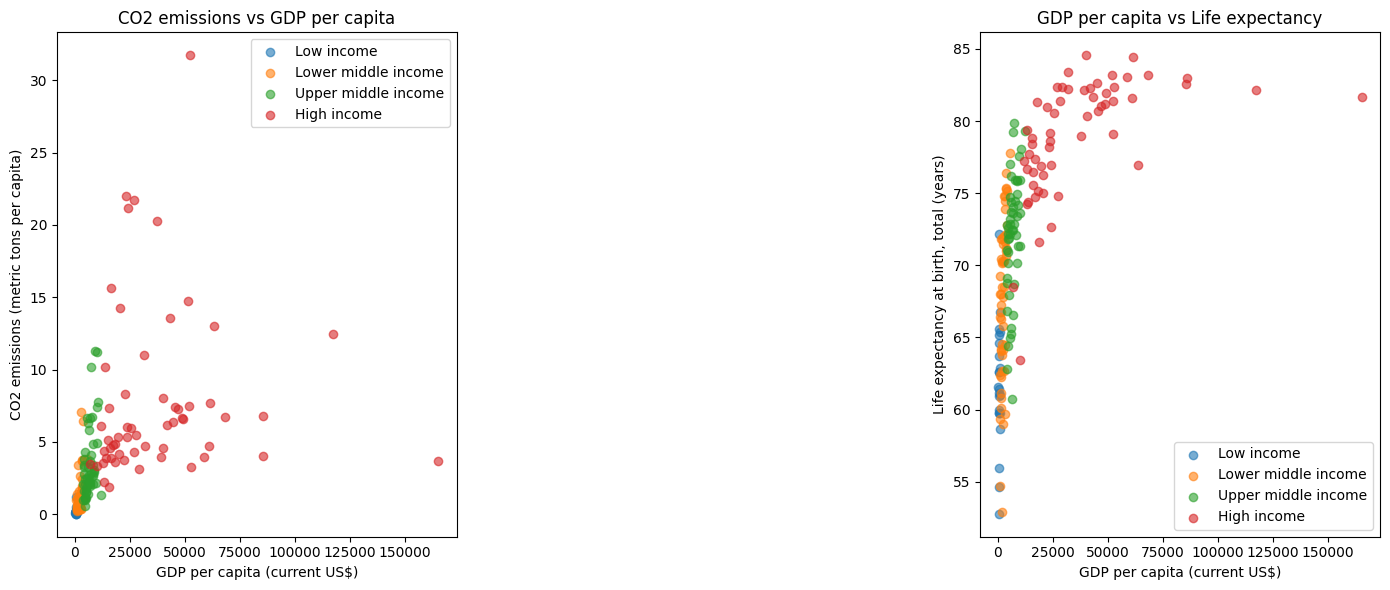

In [3]:
# Scatter plot para CO2 emissions vs GDP per capita
plt.figure(figsize=(14, 6))

# Primer subplot
plt.subplot(1, 3, 1)
for group in df_combinado['Income Group'].unique():
    subset = df_combinado[df_combinado['Income Group'] == group]
    plt.scatter(subset['GDP per capita (current US$)'], subset['CO2 emissions (metric tons per capita)'], label=group, alpha=0.6)
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('CO2 emissions vs GDP per capita')
plt.legend()

# Scatter plot para GDP per capita vs Life expectancy
plt.subplot(1, 3, 3)
for group in df_combinado['Income Group'].unique():
    subset = df_combinado[df_combinado['Income Group'] == group]
    plt.scatter(subset['GDP per capita (current US$)'], subset['Life expectancy at birth, total (years)'], label=group, alpha=0.6)
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Life expectancy at birth, total (years)')
plt.title('GDP per capita vs Life expectancy')
plt.legend()


plt.tight_layout()
plt.show()


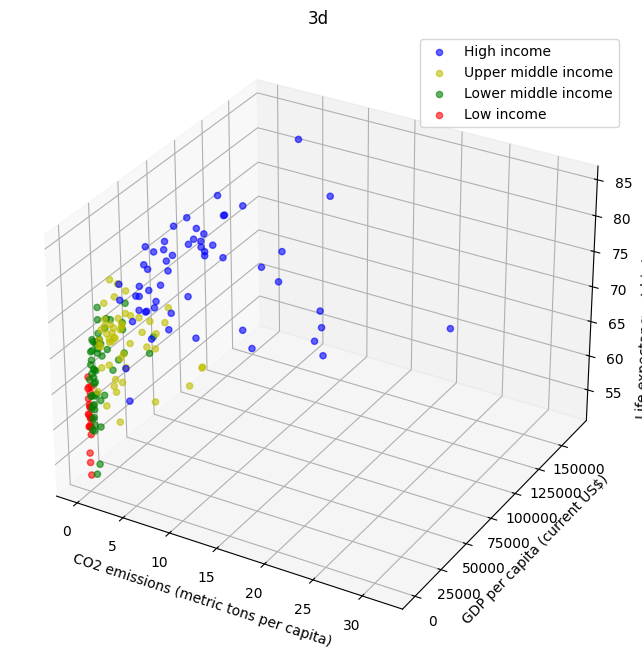

In [4]:
# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir colores para cada grupo de 'Income Group'
colors = {'High income': 'b', 'Upper middle income': 'y', 'Lower middle income': 'g', 'Low income': 'r'}

# Iterar a través de cada grupo y graficar sus puntos en el espacio 3D
for group, color in colors.items():
    subset = df_combinado[df_combinado['Income Group'] == group]
    ax.scatter(subset['CO2 emissions (metric tons per capita)'],
               subset['GDP per capita (current US$)'],
               subset['Life expectancy at birth, total (years)'],
               label=group,
               c=color,
               alpha=0.6)

# Etiquetas de los ejes
ax.set_xlabel('CO2 emissions (metric tons per capita)')
ax.set_ylabel('GDP per capita (current US$)')
ax.set_zlabel('Life expectancy at birth, total (years)')

# Título del gráfico
ax.set_title('3d')

# Leyenda
ax.legend()

# Mostrar el gráfico interactivo
plt.show()


## Seleccion del conjunto de pruebas



In [5]:
conjunto_de_pruebas[:]

,Short Name,Income Group,CO2 emissions (metric tons per capita),GDP per capita (current US$),"Life expectancy at birth, total (years)"
Country Code,,,,,
MKD,North Macedonia,Upper middle income,3.279420,5965.450232,74.395122
UZB,Uzbekistan,Lower middle income,3.376304,1759.307471,70.331000
PRY,Paraguay,Upper middle income,1.144591,5353.348045,73.182000
ARG,Argentina,Upper middle income,3.405618,8496.428157,75.892000
OMN,Oman,High income,15.636201,16707.623006,74.757000
SYC,Seychelles,High income,6.080518,12020.021914,77.236585
STP,São Tomé and Principe,Lower middle income,0.645350,2161.310201,67.785000
ISR,Israel,High income,6.345216,44846.791595,82.648780
COM,Comoros,Lower middle income,0.407112,1519.586780,64.166000


## Implementacion de KNN

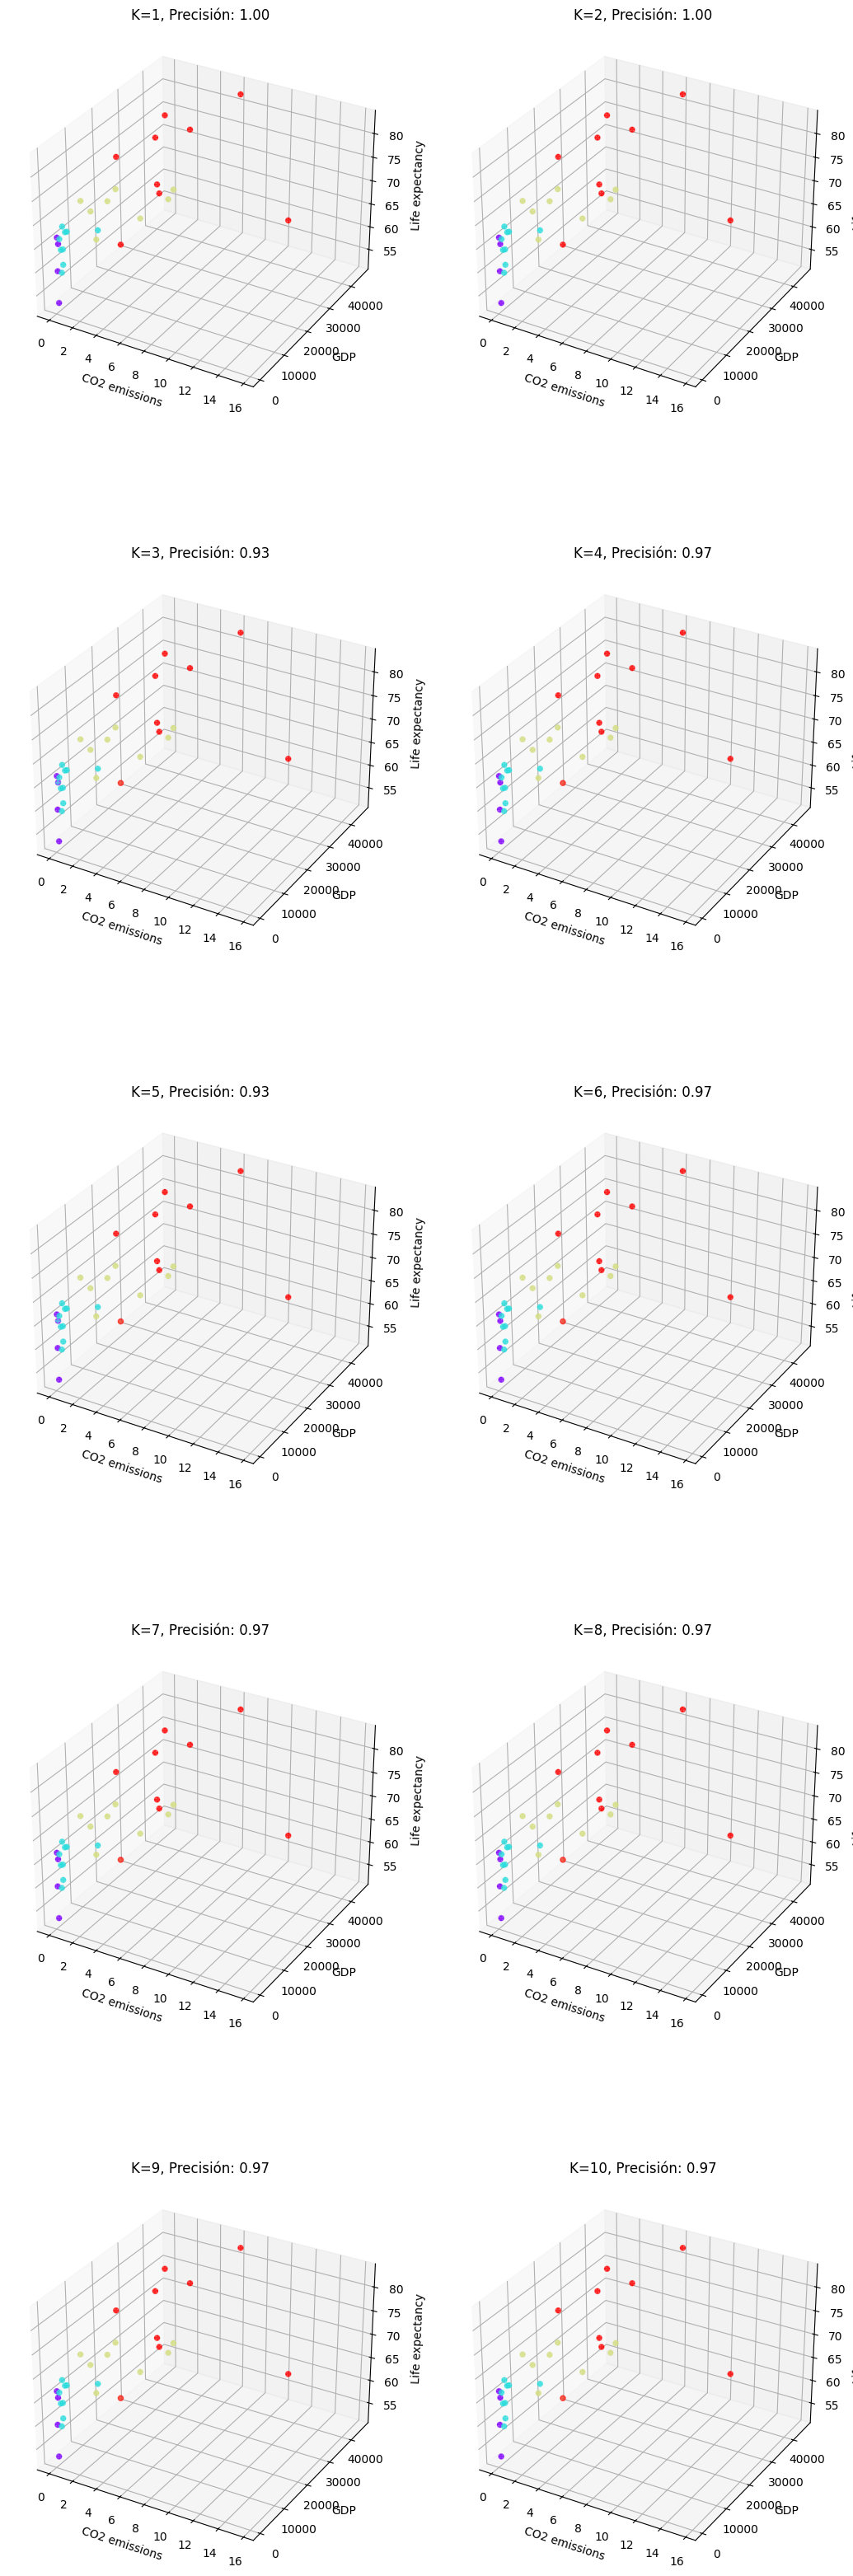

In [6]:
# Asumiendo que df_combinado y conjunto_de_pruebas son tus DataFrames de entrenamiento y prueba

# Preparar los datos
X_train = df_combinado[['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)', 'Life expectancy at birth, total (years)']]
y_train = df_combinado['Income Group']
X_test = conjunto_de_pruebas[['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)', 'Life expectancy at birth, total (years)']]
y_test = conjunto_de_pruebas['Income Group']

# Crear un mapeo de categorías a colores
unique_categories = y_train.unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_categories)))
category_to_color = {category: color for category, color in zip(unique_categories, colors)}

# Definir el rango de valores de K para probar
k_values = range(1, 11)  # Ajusta el rango según tus preferencias

# Crear una figura y un conjunto de subgráficas
fig, axs = plt.subplots(5, 2, figsize=(30, 40), subplot_kw={'projection': '3d'})  # Aumentado el tamaño de la figura

# Aplanar el arreglo de subgráficas para facilitar su acceso
axs = axs.flatten()

# Lista para almacenar las precisiones para cada valor de K
accuracies = []

# Probar diferentes valores de K y crear gráficas
for idx, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Asignar la gráfica al subplot correspondiente
    ax = axs[idx]

    # Dibujar puntos de prueba con su valor real
    for category in unique_categories:
        category_mask = y_test == category
        ax.scatter(X_test.loc[category_mask, 'CO2 emissions (metric tons per capita)'],
                   X_test.loc[category_mask, 'GDP per capita (current US$)'],
                   X_test.loc[category_mask, 'Life expectancy at birth, total (years)'],
                   color=category_to_color[category], alpha=0.6, marker='o', label=f'Real - {category}')

    # Dibujar puntos de prueba con su valor predicho
    for category in unique_categories:
        category_mask = y_pred == category
        ax.scatter(X_test.loc[category_mask, 'CO2 emissions (metric tons per capita)'],
                   X_test.loc[category_mask, 'GDP per capita (current US$)'],
                   X_test.loc[category_mask, 'Life expectancy at birth, total (years)'],
                   color=category_to_color[category], alpha=0.6, marker='+', label=f'Predicho - {category}')

    ax.set_xlabel('CO2 emissions ')
    ax.set_ylabel('GDP')
    ax.set_zlabel('Life expectancy')

    # Calcular la precisión y actualizar el título del subplot
    accuracy = accuracy_score(y_test, y_pred)
    ax.set_title(f'K={k}, Precisión: {accuracy:.2f}')

    # Solo agregar leyenda al primer subplot para evitar repetición
    # if idx == 0:
    #    ax.legend()

    accuracies.append(accuracy)

# Ajustar el espacio entre las gráficas
plt.subplots_adjust(wspace= -.7, hspace=0.4)

# Mostrar la figura
plt.show()
